In [2]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\hp\appdata\local\programs\python\python38\lib\site-packages (0.24.2)

You should consider upgrading via the 'c:\users\hp\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
data = pd.read_csv("Salary_Data.csv")
data.head(10)
# data.info()
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
real_x = data.iloc[:,0].values
real_y = data.iloc[:,1].values
real_x
# real_x = real_x.reshape(-1,1)
real_x
#real_y = real_y.reshape(-1,1) 

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
training_x, testing_x, training_y, testing_y = train_test_split(real_x, real_y, test_size=0.3, random_state=0)

In [6]:
training_x
testing_x

array([ 1.5, 10.3,  4.1,  3.9,  9.5,  8.7,  9.6,  4. ,  5.3])

In [51]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [52]:
lin = LinearRegression()
lin.fit(training_x, training_y)

LinearRegression()

In [53]:
pred_y = lin.predict(testing_x)
print(testing_y)
print(pred_y)

[[ 37731.]
 [122391.]
 [ 57081.]
 [ 63218.]
 [116969.]
 [109431.]
 [112635.]
 [ 55794.]
 [ 83088.]]
[[ 40817.78327049]
 [123188.08258899]
 [ 65154.46261459]
 [ 63282.41035735]
 [115699.87356004]
 [108211.66453108]
 [116635.89968866]
 [ 64218.43648597]
 [ 76386.77615802]]


In [54]:
testing_y[5]

array([109431.])

In [55]:
pred_y[5]

array([108211.66453108])

In [56]:
lin.coef_

array([[9360.26128619]])

In [57]:
lin.intercept_

array([26777.3913412])

In [58]:
#y=b0+b1*x
9360.26128619*10.3+26777.3913412

123188.082588957

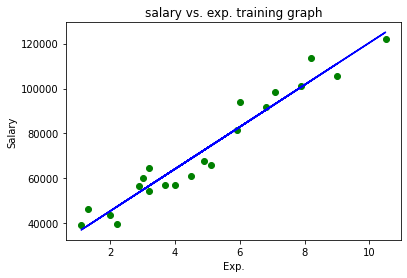

In [59]:
plt.scatter(training_x, training_y, color="green")
plt.plot(training_x, lin.predict(training_x), color="blue")
plt.title("salary vs. exp. training graph")
plt.xlabel("Exp.")
plt.ylabel("Salary")
plt.show()

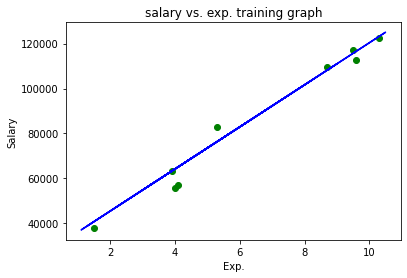

In [60]:
plt.scatter(testing_x, testing_y, color="green")
plt.plot(training_x, lin.predict(training_x), color="blue")
plt.title("salary vs. exp. training graph")
plt.xlabel("Exp.")
plt.ylabel("Salary")
plt.show()

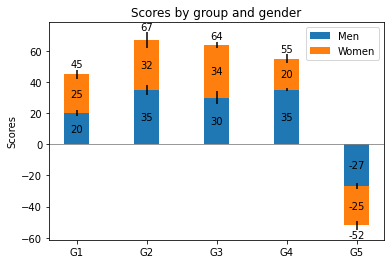

In [61]:
N = 5
menMeans = (20, 35, 30, 35, -27)
womenMeans = (25, 32, 34, 20, -25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
ig, ax = plt.subplots()

p1 = ax.bar(ind, menMeans, width, yerr=menStd, label='Men')
p2 = ax.bar(ind, womenMeans, width,
            bottom=menMeans, yerr=womenStd, label='Women')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))
ax.legend()

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')
ax.bar_label(p2) 

plt.show()


In [62]:
import pickle

In [65]:
with open("model_pickle", "wb") as file:
    pickle.dump(lin, file)

In [66]:
with open("model_pickle", "rb")as file:
    m = pickle.load(file)

In [35]:
m.coef_

array([[9360.26128619]])

In [36]:
m.predict([[5]])

array([[73578.69777217]])

In [37]:
m.intercept_

array([26777.3913412])

In [38]:
import joblib

In [39]:
joblib.dump(lin, 'model_joblib')

['model_joblib']

In [40]:
m1 = joblib.load('model_joblib')

In [41]:
m1.coef_

array([[9360.26128619]])

In [42]:
m1.intercept_

array([26777.3913412])

In [43]:
m1.predict([[1.1]])

array([[37073.67875601]])